### Arbeidskrav 1 - Gustav Gabrielsen 

### Oppgave 1: Modellen inneholder en rekke parametere. Definer disse paramterene under:

- Lambda: $\lambda$

Lambda (𝜆): Lambda representerer andelen av den arbeidsstyrken i produksjonssektoren som er lokalisert i en gitt region på et bestemt tidspunkt. Lambda er "mobil arbeidskraft" som i praksis betyr arbeiderene som jobber innen produksjonen av fabrikanter. $\lambda_1 = \lambda$ , og  $\lambda_2 = 1 - \lambda$. 

- Rho: $\rho$

Rho (𝜌): Brukes for å indikere graden av substitusjon for fabrikanter i det monopolistiske markedet. Det er definert som $\dfrac{(\sigma - 1)}{\sigma}$, hvor $\sigma$ er elastisiteten av substitusjon. Siden $\rho < 1$ er ikke alle variantene av fabrikanter perfekte substituter, men siden $\rho > 1$ kan de substituteres.   

- Epsilon: $\epsilon$ 

Epsilon (𝜖): Representerer pris elastitsiteten til etterspørselen for en fabrikant. Jo større $\epsilon$ jo større vil fallet i etterspørselen av en fabrikant være dersom prisen øker. 

- Phi: $\phi$

Phi (𝜙): Eksogent gitt andel av den globale landbruksarbeidsstyrken som er tilordent hver region. Denne arbeidsstyrken er ikke mobil, det vil si at den ikke kan flytte på seg, uten at vi endrer modellen endogent.   

- Gamma: $\gamma$

Gamma (𝛾): Andel av arbeidssttyrken L som jobber med produksjon av fabrikanter = $\gamma L$. Andel som jobber innenfor matproduksjon = $(1- \gamma)L$. 

- T: $T$

T: T representerer transportkostnader mellom regioner. I denne modellen representeres transportkostander som en fraksjon av varenes verdi, dette betyr at transport ikke innebærer noen direkte pengeoverføringer, istedenfor blir kostnadene sett på som en reduksjon i mengden varer som ankommer. Dette gjøres for å unngå å måtte modellere en seperat transport industri. 

- Betta: $\beta$

Beta (𝛽): Marginal arbeidskraft nødvendig for å produsere et gode. 

- Delta: $\delta$

Delta (𝛿): Andel av inntekt som brukes på godene i økonomien. Andel brukt på fabrikanter $\delta$ og andel brukt på mat $1- \delta$. 

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 5
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Skriv ut resultatene
print(benchmark_ratios)

[0.97827655 0.99317911 1.00278747 1.00686527 1.00535653 1.
 0.99467201 0.99318154 0.99722028 1.00686773 1.02220584]


### Oppgave 2: Ved hjelp av koden på bunnen av oppgaven, simuler modellen ved bruk av benchmark-verdiene: 

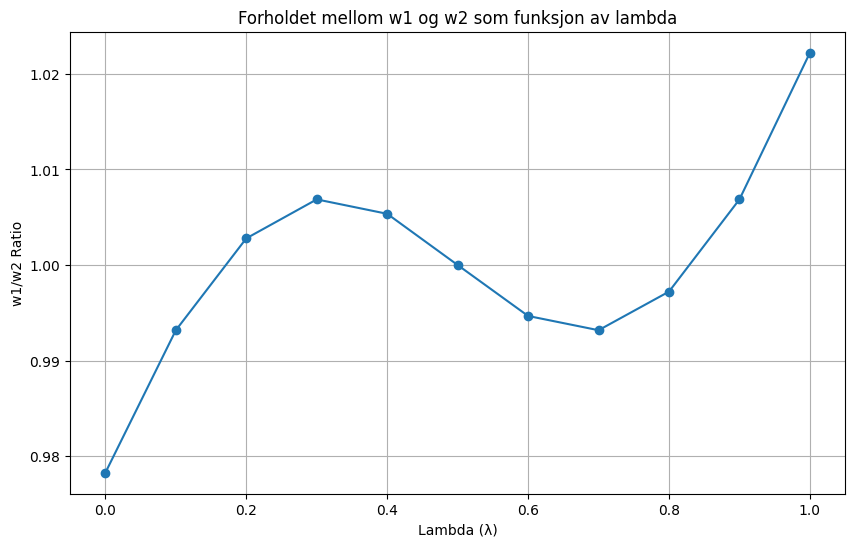

In [3]:
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Resultatene viser w1/w2-raten for ulike verdier av lambda (λ), hvor lambda representerer andelen av produksjonsstyrken som er lokalisert i en gitt region til et gitt tidspunkt. 

- Når lambda er 0.0 er hele den mobile arbeidskraften i regiion 1, og w1/w2-raten er lavere enn 1, som indikerer at lønningene i "sentrum" er lavere sammenlignet med "periferien".

- Ettersom lambda øker og nærmer seg 0.5, ser vi at w1/w2-raten nærmer seg 1, hvilket betyr at lønnsforskjellene mellom sentrum og periferi blir mindre.

- Ved lambda = 0.5, er ressursene jevnt fordelt mellom sentrum og periferi, og w1/w2-raten er nøyaktig 1, noe som indikerer lik lønn i begge regioner.

- Når lambda fortsetter å øke og nærmer seg 1.0, hvor nesten all den mobile arbeidskraften er i "sentrum", ser vi at w1/w2-raten stiger over 1. Dette viser at lønningene i "sentrum" er høyere enn i "periferien".

- Ved lambda = 1.0, hvor all mobil arbeidskraft er i "sentrum", er w1/w2-raten tydelig høyere enn 1, som indikerer betydelig høyere lønninger i "sentrum" sammenlignet med "periferien".

Grafen viser hvordan lønnsforholdet varierer med endringer i befolknings- eller ressursfordelingen mellom "sentrum" og "periferi". 

### Oppgave 3: I deloppgavene må du variere parameterne. Hver underoppgave løses i et vakuum, så for eksempel etter oppgave a) er fullført så settes T tilbake til 1.7 før neste oppgave løses. Vis gjerne grafisk. 

a)  T endres fra 1.7 til 1.2, hvordan endrer w1/w2 raten seg? For hvilke verdier av 𝜆 vil 
bedriftene agglomerere i region 1? 

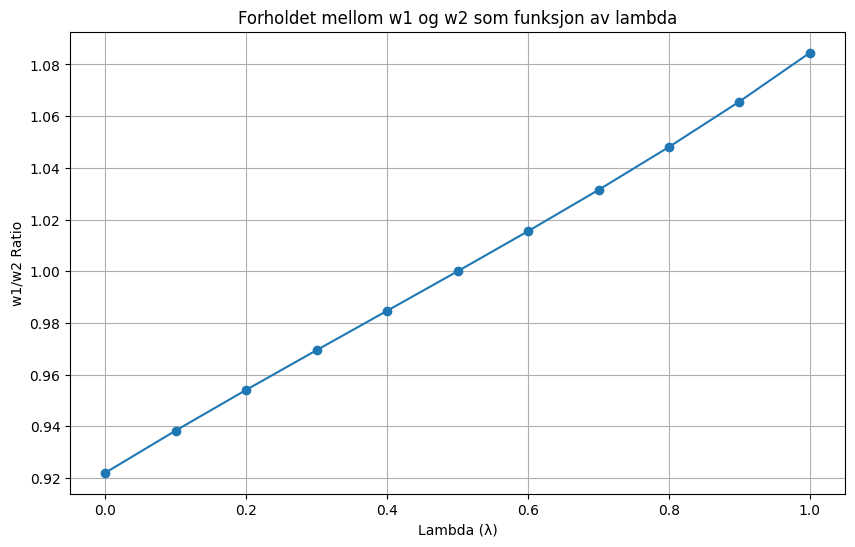

In [4]:
T = 1.2

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Når handelskostnaden 𝑇 reduseres fra 1.7 til 1.2, observerer vi følgende endringer i w1/w2-raten:

- Reduksjonen i 𝑇 fører til at forholdet 𝑤1/𝑤2 øker for høyere verdier av 𝜆. Dette indikerer at lønningene i region 1 (sentrum) blir relativt høyere sammenlignet med region 2 (periferien) når handelskostnadene mellom regionene synker. Dette kan forklares med at lavere handelskostnader gjør det mer lønnsomt for bedrifter å agglomerere i regionen med høyere λ (sentrum), siden transport av varer mellom regionene blir billigere og mindre restriktiv.

- Fra grafen ser vi at 𝑤1/𝑤2 er større enn 1 når 𝜆 er 0.6 eller høyere. Dette betyr at for disse verdiene av 𝜆 vil bedriftene tendere til å agglomerere i region 1. Disse verdiene indikerer at når majoriteten av ressursene eller befolkningen er lokalisert i region 1, blir denne regionen mer attraktiv økonomisk sett, ytterligere forsterket av lavere handelskostnader.

b)  Andel bønder i region 2 øker fra 0.5 til 0.7? Hva skjer med w1/w2 raten?

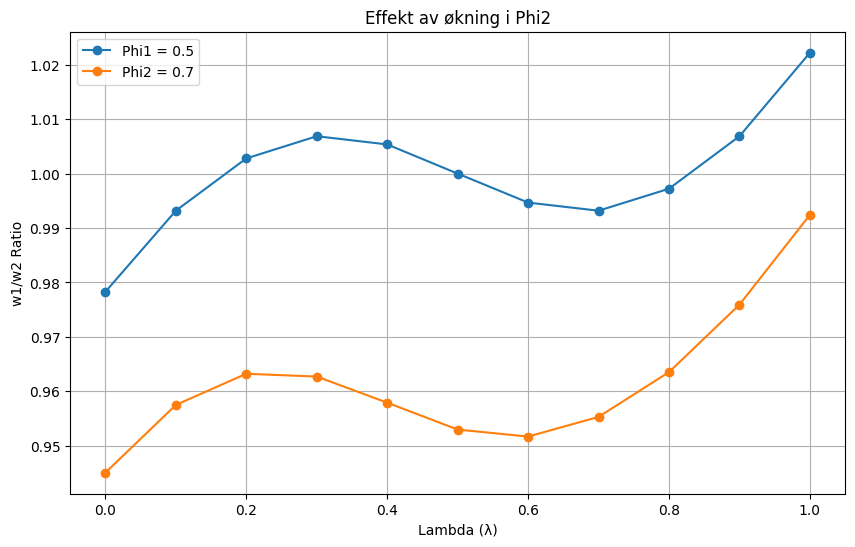

In [5]:
phi1 = 0.5
phi2 = 0.7

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten med spesifisert phi2 for region 2
def calculate_w_ratio_adjusted_phi2(lambda_val, gamma, L, phi1, phi2, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W, phi):
        return lmbda * gamma * L * W + phi * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1, phi1)
        Y2 = calc_Y(lmbda2, W2, phi2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Oppsett av konstanter og lambda-verdier
gamma = 0.4
L = 1
phi1 = 0.5  # Produktivitet i region 1
phi2_original = 0.5  # Original produktivitet i region 2
phi2_new = 0.7  # Ny produktivitet i region 2
beta = 0.8
epsilon = 5
delta = 0.4
alpha = (gamma * L / epsilon)
rho = 1 - (1 / epsilon)
T = 1.7
LIMIT = 0.0001
lambda_values = np.linspace(0, 1, 11)

# Simulering for begge scenariene
original_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
new_phi2_ratios = np.array([calculate_w_ratio_adjusted_phi2(lam, gamma, L, phi1, phi2_new, beta, rho, alpha, epsilon, delta, T, LIMIT) for lam in lambda_values])

# Plotting av resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, original_ratios, 'o-', label='Phi1 = 0.5')
plt.plot(lambda_values, new_phi2_ratios, 'o-', label='Phi2 = 0.7')
plt.title('Effekt av økning i Phi2')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.legend()
plt.grid(True)
plt.show()

Ved å øke andel for bønder i region 2 fra 0.5 til 0.7 ser vi endringer i 𝑤1/𝑤2 som følger:

- Den oppdaterte grafen viser at 𝑤1/𝑤2- raten blir lavere for de fleste verdier av 𝜆 når andelen i region 2 (phi2) økes til 0.7. Dette indikerer at lønningene i region 2 relativt sett blir bedre sammenlignet med region 1 når andelen bønder øker.

- En økt produktivitet i region 2 gjør regionen mer attraktiv økonomisk, som kan lede til en bedre balanse mellom lønninger mellom de to regionene, eller til og med en fordel for region 2 hvis produktivitetsøkningen er signifikant nok. Disse resultatene illustrerer hvordan en økning i produktivitet i "periferien" (region 2) kan minske lønnsforskjellene mellom sentrum og periferien, og potensielt bidra til en mer balansert økonomisk utvikling mellom de to regionene.

c) Dersom benchmark verdiene holdes, for hvilke lambda vil den langsiktige likevekten være fullstendig agglomerering i en region? 

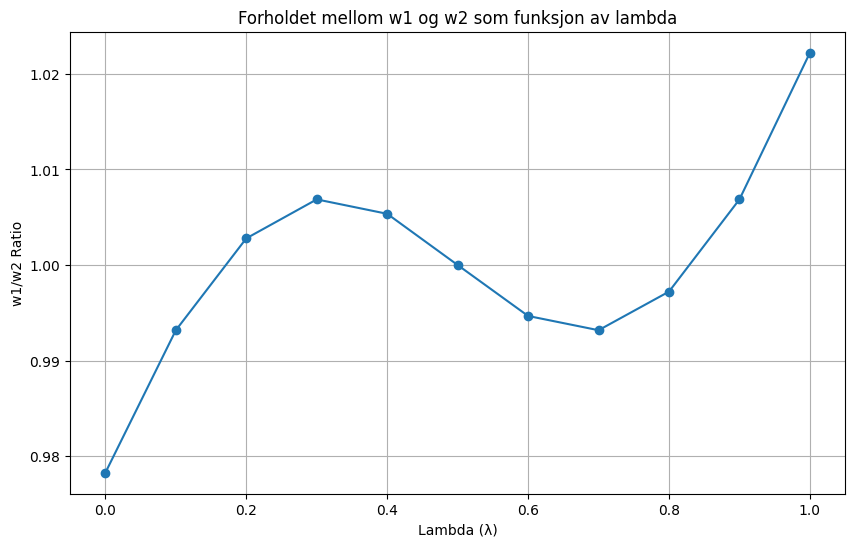

In [6]:
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Når 𝜆 = 1, indikerer dette fullstendig agglomerering i region 1. Når 𝜆 = 0, viser det fullstendig agglomerering i region 2.

d)  Dersom 𝜖 = 2, for hvilke verdier av lambda vil den langsiktige likevekten være fullstendig agglomerering i en region?

<>:83: SyntaxWarning: invalid escape sequence '\e'
<>:83: SyntaxWarning: invalid escape sequence '\e'
C:\Users\gusta\AppData\Local\Temp\ipykernel_15064\2339692014.py:83: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Forholdet mellom w1 og w2 som funksjon av lambda ($\epsilon = 2 $)')


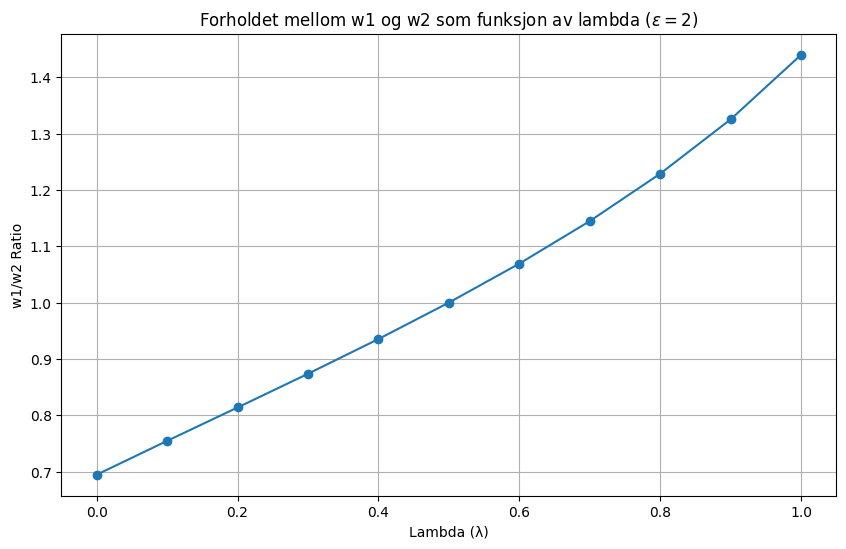

In [13]:

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 2
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda ($\epsilon = 2 $)')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show();

Når man reduserer priselastisiteten til etterspørselen, slik at den blir mindre elastisk, som gjøres her, betyr det at etterspørselen etter fabrikantens produkter blir mindre følsom for prisendringer.

I grafen med 𝜖 = 2, vil fullstendig agglomerering i en region indikeres der lønnsratene (𝑤1/𝑤2) viser ekstreme verdier, typisk veldig høye eller veldig lave, noe som reflekterer en sterk forskjell i økonomisk attraktivitet mellom de to regionene.

Fra grafen ser vi følgende:

- Når 𝜆 nærmer seg 0, ser det ut til at 𝑤1/𝑤2 faller kraftig, noe som indikerer en  agglomerering i region 2 siden lønnen (eller den økonomiske aktiviteten) i region 1 blir mye lavere sammenlignet med region 2.

- Når 𝜆 nærmer seg 1, øker 𝑤1/𝑤2-forholdet, noe som kan tyder på fullstendig agglomerering i region 1, da nesten all økonomisk aktivitet og dermed lønnen er høyere der sammenlignet med region 2.

Langsiktig likevekt for fullstendig agglomerering:
- Fullstendig agglomerering i region 1 vil sannsynligvis skje når λ er meget nær 1.
- Fullstendig agglomerering i region 2 vil sannsynligvis skje når 𝜆 er meget nær 0.

### Litteraturhenvisning 

 Brakman, S., Garretsen, H., van Marrewijk, C. (2020) "An Introduction to Geographical and Urban Economics – A Spiky World". Cambridge University Press.

 